# Aula 1: Feature Engineering

## Transformação de dados
- Mudanças de escala
- Normalização e padronização 
- Transformação log
- Binning e One-hot-encoding
- Processando datas

## Importings

In [1]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from pycaret.datasets import get_data

In [3]:
df = pd.read_csv('AtrasoCartaoCredito.csv')

In [4]:
df.head()

,ID,Target,GrupoEconomico,Sexo,Idade,GrupoRisco,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,RegiaodoPais,NumeroComprasOnline
0,1,0,3,homem,22,1,7250.0,517.857143,604.166667,MG,Morada Nova de Minas,Região Sudeste,54.924242
1,2,1,1,mulher,38,1,71283.0,5091.642857,5940.250000,RN,Marcelino Vieira,Região Nordeste,312.644737
2,3,1,3,mulher,26,0,7925.0,566.071429,660.416667,PR,Agudos do Sul,Região Sul,50.801282
3,4,1,1,mulher,35,1,531.0,37.928571,44.250000,PR,Congonhinhas,Região Sul,2.528571
4,5,0,3,homem,35,0,805.0,57.500000,67.083333,BA,Morpará,Região Nordeste,3.833333


## Variáveis numéricas

### Mudanças de escala

In [6]:
sns.get_dataset_names()

['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [7]:
df_tips = sns.load_dataset('tips')

### Normalização e padronização 

![](http://androidkt.com/wp-content/uploads/2020/10/Selection_060.png)

In [9]:
df.head()

,ID,Target,GrupoEconomico,Sexo,Idade,GrupoRisco,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,RegiaodoPais,NumeroComprasOnline
0,1,0,3,homem,22,1,7250.0,517.857143,604.166667,MG,Morada Nova de Minas,Região Sudeste,54.924242
1,2,1,1,mulher,38,1,71283.0,5091.642857,5940.250000,RN,Marcelino Vieira,Região Nordeste,312.644737
2,3,1,3,mulher,26,0,7925.0,566.071429,660.416667,PR,Agudos do Sul,Região Sul,50.801282
3,4,1,1,mulher,35,1,531.0,37.928571,44.250000,PR,Congonhinhas,Região Sul,2.528571
4,5,0,3,homem,35,0,805.0,57.500000,67.083333,BA,Morpará,Região Nordeste,3.833333


In [14]:
df.drop(columns=['ID'], inplace=True)

In [15]:
col_num = df.select_dtypes(exclude='O').columns.tolist()
col_num

['Target',
 'GrupoEconomico',
 'Idade',
 'GrupoRisco',
 'ValorCompraAnual',
 'GastoMax',
 'GastoMedio',
 'NumeroComprasOnline']

In [16]:
col_num.remove('Target')

In [19]:
col_num.remove('GrupoEconomico')
col_num.remove('GrupoRisco')

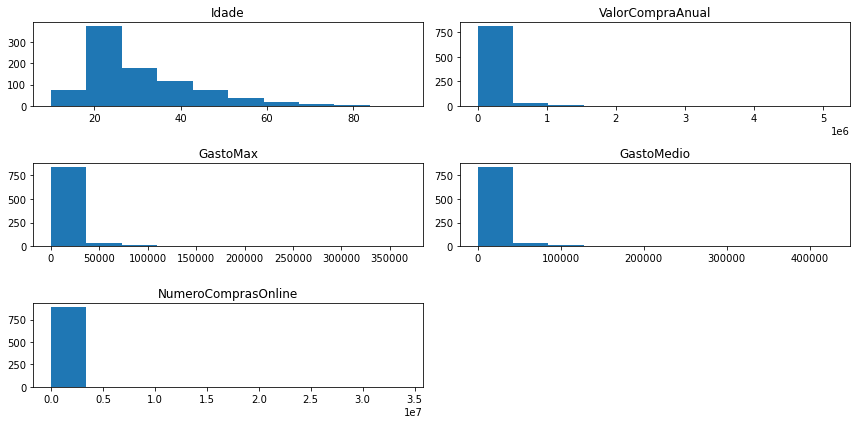

In [24]:
df[col_num].hist(figsize=(12, 6), grid=False)
plt.tight_layout();

In [28]:
df[col_num].describe()

,Idade,ValorCompraAnual,GastoMax,GastoMedio,NumeroComprasOnline
count,891.000000,8.630000e+02,891.000000,891.000000,8.910000e+02
mean,30.402918,1.138834e+05,8278.971380,9658.799944,4.879393e+04
std,12.579024,3.976690e+05,28684.456627,33465.199399,1.154341e+06
min,10.000000,0.000000e+00,0.000000,0.000000,0.000000e+00
25%,22.000000,1.610000e+02,11.500000,13.416667,1.096117e+00
50%,26.000000,2.415000e+03,172.500000,201.250000,1.321429e+01
75%,36.000000,7.883350e+04,5628.000000,6566.000000,5.728338e+02
max,92.000000,5.123292e+06,365949.428571,426941.000000,3.410762e+07


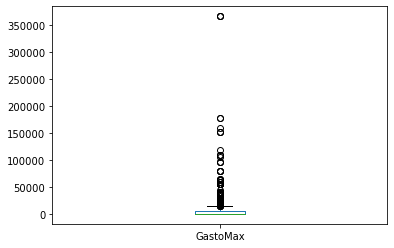

In [30]:
df['GastoMax'].plot(kind='box');

C:\Users\milto\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


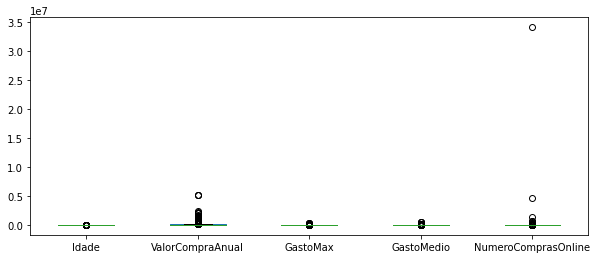

In [26]:
df[col_num].plot(kind='box', figsize=(10, 4));

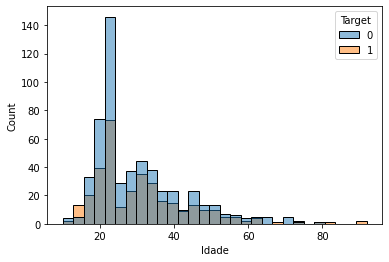

In [34]:
sns.histplot(data=df, x='Idade', hue='Target');

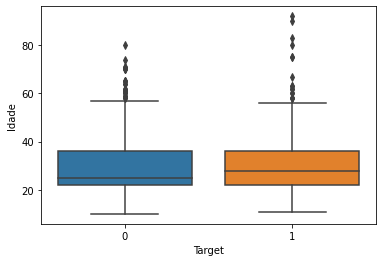

In [36]:
sns.boxplot(data=df, y='Idade', x='Target');

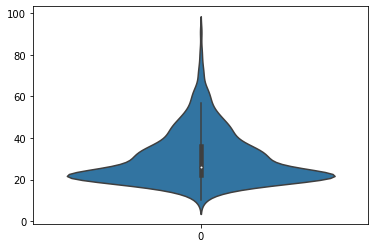

In [32]:
sns.violinplot(data=df['Idade'])

In [27]:
df[col_num].head()

,Idade,ValorCompraAnual,GastoMax,GastoMedio,NumeroComprasOnline
0,22,7250.0,517.857143,604.166667,54.924242
1,38,71283.0,5091.642857,5940.250000,312.644737
2,26,7925.0,566.071429,660.416667,50.801282
3,35,531.0,37.928571,44.250000,2.528571
4,35,805.0,57.500000,67.083333,3.833333


In [39]:
df['Idade'].min(), df['Idade'].max()

(10, 92)

In [40]:
from sklearn.preprocessing import MinMaxScaler

In [41]:
scaler_minmax = MinMaxScaler()

In [42]:
df[col_num].head()

,Idade,ValorCompraAnual,GastoMax,GastoMedio,NumeroComprasOnline
0,22,7250.0,517.857143,604.166667,54.924242
1,38,71283.0,5091.642857,5940.250000,312.644737
2,26,7925.0,566.071429,660.416667,50.801282
3,35,531.0,37.928571,44.250000,2.528571
4,35,805.0,57.500000,67.083333,3.833333


In [43]:
df_scaler = scaler_minmax.fit_transform(df[col_num])

In [47]:
df_scaler = pd.DataFrame(df_scaler, columns=col_num)

C:\Users\milto\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


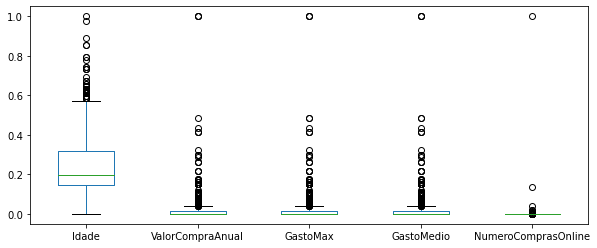

In [48]:
df_scaler.plot(kind='box', figsize=(10, 4));

![](https://www.simplypsychology.org/Z-score-formula.jpg)

In [51]:
df['Idade'].mean(), df['Idade'].std()

(30.402918069584736, 12.57902447107251)

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler_std = StandardScaler()

In [54]:
df_scaler = scaler_std.fit_transform(df[col_num])

In [56]:
df_scaler = pd.DataFrame(df_scaler, columns=col_num)

In [58]:
df_scaler.describe()

,Idade,ValorCompraAnual,GastoMax,GastoMedio,NumeroComprasOnline
count,8.910000e+02,8.630000e+02,8.910000e+02,8.910000e+02,8.910000e+02
mean,-1.946940e-17,7.886057e-17,9.251859e-17,1.083433e-16,9.251859e-18
std,1.000562e+00,1.000580e+00,1.000562e+00,1.000562e+00,1.000562e+00
min,-1.622890e+00,-2.865435e-01,-2.887843e-01,-2.887843e-01,-4.229370e-02
25%,-6.683855e-01,-2.861384e-01,-2.883832e-01,-2.883832e-01,-4.229275e-02
50%,-3.502172e-01,-2.804671e-01,-2.827672e-01,-2.827672e-01,-4.228224e-02
75%,4.452035e-01,-8.818952e-02,-9.247030e-02,-9.247030e-02,-4.179717e-02
max,4.899559e+00,1.260424e+01,1.247614e+01,1.247614e+01,2.952158e+01


C:\Users\milto\anaconda3\lib\site-packages\numpy\core\_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


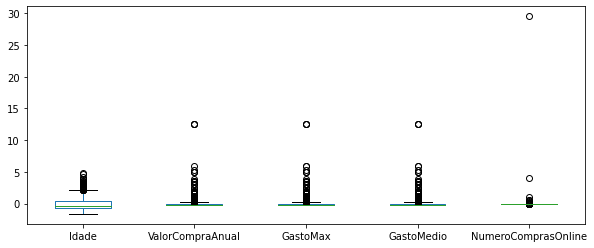

In [59]:
df_scaler.plot(kind='box', figsize=(10, 4));

### Transformação log

![](https://image.slidesharecdn.com/4-140505141858-phpapp01/95/4transformations-10-638.jpg?cb=1399299626)

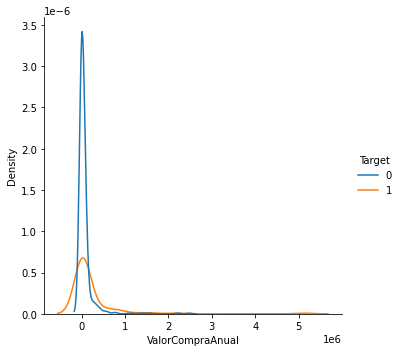

In [65]:
sns.displot(data=df, x='ValorCompraAnual', hue='Target', kind='kde');

In [70]:
df['ValorCompraAnual_log'] = np.log(df['ValorCompraAnual'] + 1)

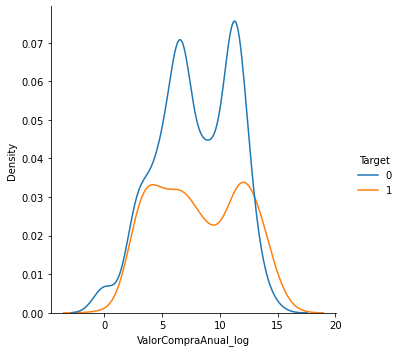

In [72]:
sns.displot(data=df, x='ValorCompraAnual_log', hue='Target', kind='kde');

Exemplos de modelos paramétricos:
- GLM - generalized linear models
    - regressao logistica
    - regressao linear
    - regressao poisson
    - exponencial
    
Exemplos de modelos não paramétricos:
- decision tree
- knn
- svm
- random forest

#### Multicolinearidade

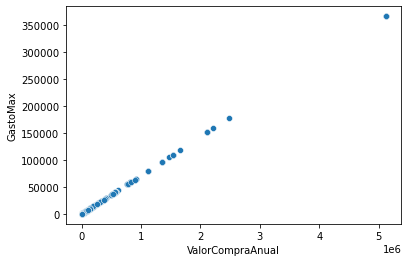

In [75]:
sns.scatterplot(data=df, x='ValorCompraAnual', y='GastoMax');

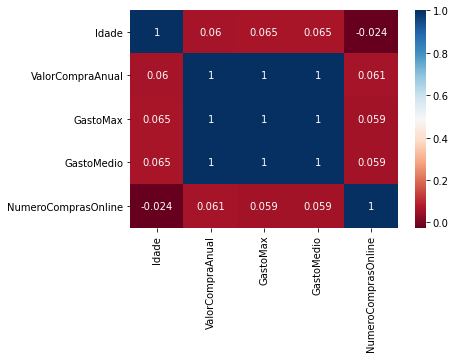

In [77]:
sns.heatmap(df[col_num].corr(),
            annot=True, cmap='RdBu')

## Variáveis categóricas

### Binning e One-hot-encoding

![](https://ichi.pro/assets/images/max/724/1*ieFTW63rKI2IyWBP-BU0JQ.png)

In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
le = LabelEncoder()

In [83]:
df['UF_le'] = le.fit_transform(df['UF'])

In [85]:
pd.crosstab(df['UF'], df['UF_le'])

UF_le,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
UF,,,,,,,,,,,,,,,,,,,,,
AC,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AL,0,19,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AM,0,0,16,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
AP,0,0,0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
BA,0,0,0,0,108,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
CE,0,0,0,0,0,43,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ES,0,0,0,0,0,0,16,0,0,0,...,0,0,0,0,0,0,0,0,0,0
GO,0,0,0,0,0,0,0,27,0,0,...,0,0,0,0,0,0,0,0,0,0
MA,0,0,0,0,0,0,0,0,39,0,...,0,0,0,0,0,0,0,0,0,0


In [84]:
df.head()

,Target,GrupoEconomico,Sexo,Idade,GrupoRisco,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,RegiaodoPais,NumeroComprasOnline,ValorCompraAnual_log,UF_le
0,0,3,homem,22,1,7250.0,517.857143,604.166667,MG,Morada Nova de Minas,Região Sudeste,54.924242,8.888895,9
1,1,1,mulher,38,1,71283.0,5091.642857,5940.250000,RN,Marcelino Vieira,Região Nordeste,312.644737,11.174427,18
2,1,3,mulher,26,0,7925.0,566.071429,660.416667,PR,Agudos do Sul,Região Sul,50.801282,8.977904,16
3,1,1,mulher,35,1,531.0,37.928571,44.250000,PR,Congonhinhas,Região Sul,2.528571,6.276643,16
4,0,3,homem,35,0,805.0,57.500000,67.083333,BA,Morpará,Região Nordeste,3.833333,6.692084,4


### Mean encoding

In [87]:
pd.crosstab(df['GrupoEconomico'], df['Target'])

Target,0,1
GrupoEconomico,,
1,80,136
2,97,87
3,372,119


In [89]:
freq_norm = pd.crosstab(df['GrupoEconomico'], df['Target'], normalize='index')
freq_norm

Target,0,1
GrupoEconomico,,
1,0.370370,0.629630
2,0.527174,0.472826
3,0.757637,0.242363


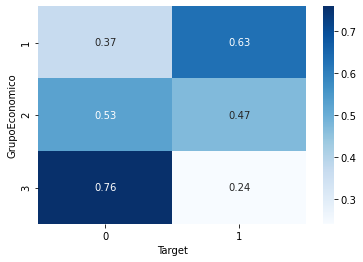

In [91]:
sns.heatmap(freq_norm, annot=True, cmap='Blues');

In [93]:
mean_group_eco = df.groupby('GrupoEconomico')['Target'].mean().to_dict()
mean_group_eco

{1: 0.6296296296296297, 2: 0.47282608695652173, 3: 0.24236252545824846}

In [94]:
df['GrupoEconomico_mean_eco'] = df['GrupoEconomico'].map(mean_group_eco)

In [111]:
df[['Target', 'GrupoEconomico', 'GrupoEconomico_mean_eco']].head()

,Target,GrupoEconomico,GrupoEconomico_mean_eco
0,0,3,0.242363
1,1,1,0.629630
2,1,3,0.242363
3,1,1,0.629630
4,0,3,0.242363


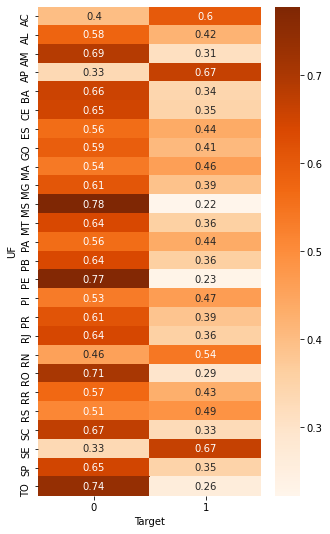

In [99]:
plt.figure(figsize=(5, 9))
sns.heatmap(pd.crosstab(df['UF'], df['Target'], normalize='index'), 
            annot=True, cmap='Oranges');

In [100]:
mean_group_eco = df.groupby('UF')['Target'].mean().to_dict()
mean_group_eco

{'AC': 0.6,
 'AL': 0.42105263157894735,
 'AM': 0.3125,
 'AP': 0.6666666666666666,
 'BA': 0.3425925925925926,
 'CE': 0.3488372093023256,
 'ES': 0.4375,
 'GO': 0.4074074074074074,
 'MA': 0.46153846153846156,
 'MG': 0.3897058823529412,
 'MS': 0.2222222222222222,
 'MT': 0.36,
 'PA': 0.4375,
 'PB': 0.3611111111111111,
 'PE': 0.23076923076923078,
 'PI': 0.4666666666666667,
 'PR': 0.38596491228070173,
 'RJ': 0.35714285714285715,
 'RN': 0.5416666666666666,
 'RO': 0.29411764705882354,
 'RR': 0.42857142857142855,
 'RS': 0.4883720930232558,
 'SC': 0.3269230769230769,
 'SE': 0.6666666666666666,
 'SP': 0.35064935064935066,
 'TO': 0.2631578947368421}

In [101]:
df['UF_mean_eco'] = df['UF'].map(mean_group_eco)

In [104]:
df['UF_mean_eco'].min()

0.2222222222222222

In [102]:
df.head()

,Target,GrupoEconomico,Sexo,Idade,GrupoRisco,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,RegiaodoPais,NumeroComprasOnline,ValorCompraAnual_log,UF_le,GrupoEconomico_mean_eco,UF_mean_eco
0,0,3,homem,22,1,7250.0,517.857143,604.166667,MG,Morada Nova de Minas,Região Sudeste,54.924242,8.888895,9,0.242363,0.389706
1,1,1,mulher,38,1,71283.0,5091.642857,5940.250000,RN,Marcelino Vieira,Região Nordeste,312.644737,11.174427,18,0.629630,0.541667
2,1,3,mulher,26,0,7925.0,566.071429,660.416667,PR,Agudos do Sul,Região Sul,50.801282,8.977904,16,0.242363,0.385965
3,1,1,mulher,35,1,531.0,37.928571,44.250000,PR,Congonhinhas,Região Sul,2.528571,6.276643,16,0.629630,0.385965
4,0,3,homem,35,0,805.0,57.500000,67.083333,BA,Morpará,Região Nordeste,3.833333,6.692084,4,0.242363,0.342593


### category encoder

https://medium.com/datarisk-io/como-melhor-tratar-vari%C3%A1veis-categ%C3%B3ricas-para-modelos-de-machine-learning-parte-1-a0e3a946bb1e

In [ ]:
!pip install category-encoders

In [106]:
from category_encoders import JamesSteinEncoder

In [107]:
james = JamesSteinEncoder(cols=['UF'])

In [108]:
x = df[['UF']]
y = df['Target']

In [109]:
x_james = james.fit_transform(x, y)

C:\Users\milto\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [110]:
x_james

,UF
0,0.386991
1,0.465803
2,0.384978
3,0.384978
4,0.361180
...,...
886,0.361180
887,0.361180
888,0.333929
889,0.426970


In [112]:
df.head()

,Target,GrupoEconomico,Sexo,Idade,GrupoRisco,ValorCompraAnual,GastoMax,GastoMedio,UF,CidadeResidencia,RegiaodoPais,NumeroComprasOnline,ValorCompraAnual_log,UF_le,GrupoEconomico_mean_eco,UF_mean_eco
0,0,3,homem,22,1,7250.0,517.857143,604.166667,MG,Morada Nova de Minas,Região Sudeste,54.924242,8.888895,9,0.242363,0.389706
1,1,1,mulher,38,1,71283.0,5091.642857,5940.250000,RN,Marcelino Vieira,Região Nordeste,312.644737,11.174427,18,0.629630,0.541667
2,1,3,mulher,26,0,7925.0,566.071429,660.416667,PR,Agudos do Sul,Região Sul,50.801282,8.977904,16,0.242363,0.385965
3,1,1,mulher,35,1,531.0,37.928571,44.250000,PR,Congonhinhas,Região Sul,2.528571,6.276643,16,0.629630,0.385965
4,0,3,homem,35,0,805.0,57.500000,67.083333,BA,Morpará,Região Nordeste,3.833333,6.692084,4,0.242363,0.342593


In [113]:
james = JamesSteinEncoder(cols=['GrupoEconomico'])

In [116]:
ge_james = james.fit_transform(df[['GrupoEconomico']], df['Target'])

C:\Users\milto\anaconda3\lib\site-packages\category_encoders\utils.py:21: FutureWarning: is_categorical is deprecated and will be removed in a future version.  Use is_categorical_dtype instead
  elif pd.api.types.is_categorical(cols):


In [117]:
df['GrupoEconomico_james'] = ge_james

In [ ]:
df['GrupoEconomico_mean_eco']

In [118]:
df[['Target', 'GrupoEconomico', 'GrupoEconomico_mean_eco', 'GrupoEconomico_james']].head()

,Target,GrupoEconomico,GrupoEconomico_mean_eco,GrupoEconomico_james
0,0,3,0.242363,0.242363
1,1,1,0.629630,0.629630
2,1,3,0.242363,0.242363
3,1,1,0.629630,0.629630
4,0,3,0.242363,0.242363


# PAUSA - VOLTAMOS 21:05

### Pipeline

![](https://ichi.pro/assets/images/max/724/1*ONryJuHGGUZ6PUmYTMiFxQ.png)

![](https://iaml.it/blog/optimizing-sklearn-pipelines/images/pipeline-diagram.png)

### Processando datas

#### Timestamp

#### Period

#### Date_range

#### Exemplo

#### Converter datetime